# Σύγκριση Αλγορίθμων Ταξινόμησης Με Τη Βιβλιοθήκη Sklearn

## Το σετ δεδομένων (Data Set)

Το data set που θα χρησιμοποιηθεί στο notebook αυτό, περιέχει στοιχεία πελατών από διάφορες τράπεζες.

Στόχος είναι  να εντοπίσουμε εάν ένας πελάτης αποχωρεί από την τράπεζα (κλείνοντας το λογαριασμό του), ή εάν συνεχίζει να χρησιμοποιεί τις υπηρεσίες της.

Το δεδομένο που θέουμε να εξετάσουμε αποτελεί ένα binary variable (δυαδική μεταβλητή).<br>
Πρόκειται δηλαδή για μία μεταβλητή της οποίας οι τιμές είναι αληθείς (true) ή ψευδείς (false).<br>
Αλλιώς κυμαίνονται απο τις τιμές <b>0 - 1</b>

## Αλγόριθμοι που θα δοκιμαστούν

Προκειμένου να προλέψουμε εάν ένας πελάτης θα αποχωρήσει από μια τράπεζα, θα χρησιμοποιήσουμε τους εξής αλγορίθμους:

1. SVM (suport Vector machine)
2. KNN (k-nearest neighbour)
3. Random Forest
4. Naive Bayes 

Πρόκειται για αλγορίθμους που είναι υλοποιημένοι στη βιβλιοθήκη της python sklearn.

Με την ολοκλήρωση της εφαρμογής κάθε αλγόριθμου, θα χρησιμοποιήσουμε για τη σύγκρηση:

* Score του κάθε αλγορίθμου
* Confusion Matrix

## Python imports για την επεξεργασία του data set

In [74]:
import numpy as np #linear agebra
import pandas as pd #data processing for our CSV file
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv("bank_data.csv")

## Εμφάνιση των δεδομένων του data set

Πρωτού προβούμε στην προεπεξεργασία, θα χρειαστεί πρώτα να κατανοήσουμε τα δεδομένα του data set

Με την εντολή:

In [75]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Το data set αυτό αποτελείται από 14 χαρακτηριστικά.

### Χαρακτηριστικά των δεδομένων

Στη συνέχεια θα εμφανίσουμε μερικές πληροφορίες σχετικά με το data set.

Αυτό επιτυγχάνεται με την εντολή:

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


Εδώ απεικονίζονται πιο καθαρά τα χαρακτηριστικά του data set, αλλά και ο τύπος των δεδομένων τους.
Επιπλέον φαίνοντναι και οι τιμές που δεν είναι κενές (non-null)

### Δημιουργία heat-map δεδομένων


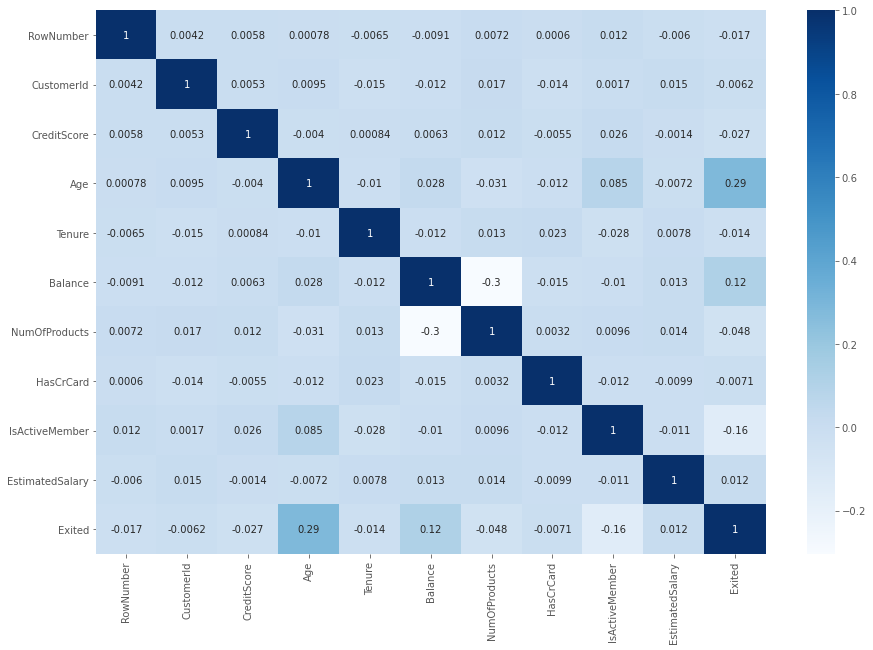

In [81]:
plt.style.use('ggplot')
fig=plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, cmap = plt.cm.Blues)

* Το heatmap εμφανίζει μερικές χρήσιμες συσχετίσεις, όπως για παράδειγμα η στήλη 'Age' συσχετίζεται θετικά με τη στήλη (positive related) 'Exited'
* Τα στοιχεία των οποίων το χρώμα είναι πιο σκούρο συσχετίζονται περισσότερο μεταξύ του
* Αντίθετα τα στοιχεία με πιο ανοιχτό χρώμα δε συσχετίζονται τόσο πολύ. Για παράδειγμα η στήλη 'NumOfProducts' δε συσχετίζεται με τη στήλη 'Balance'

## Προεπεξεργασία και διαχωρισμός δεδομένων

Προκειμένου οι αλγόριθμοι να έχουν μεγαλύτερη αποδοτικότητα, θα πρέπει το data set να υποστεί κάποιες επεξεργασίες.<br>
Η διαδικασία αυτή ονομάζετται προεπεξεργασία (preprocessing) και εφαρμόζεται πριν τη χρήση κάποιου αλγόριθμου.<br>

Στη συνέχεια θα πρέπει να διαχωρίσουμε το data set σε <b>Ζητούμενα (y)</b> και <b>δεδομένα (x)</b>

### Αχρείαστες στήλες και διαγραφή 

Για την επίλυση του προβλήματος, θα διαγράψουμε κάποια χαρακτηριστικά που δε χρειάζονται.
Αυτά ειναι τα παρακάτω:

* RowNumber
* CustomerId
* Surname
* Geography

In [4]:
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis = 1, inplace = True)

* axis = 1: επιλογή του άξονα με τις στήλες
* inplace = True: Διαγραφή χωρίς εκ νέου ανάθεσης

### Αλλαγή των τιμών σε 0 και 1

Στο data set το χαρακτηριστικό του γένους περιέχει αλφαριθμητικά.

Για να το απλοποιήσουμε αυτό θα μετατρέψουμε τα Female/Male σε 0/1

In [5]:
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]

In [6]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


Όπως διακρίνουμε τα δεόμενα στη στήλη Gender έχουν γίνει 0.<br> 
Άρα αυτό σημαίνει ότι οι πέντε πρώτες γραμμές περιέχουν πελάτες γένους θηλυκού.

### Διαχωρισμός δεδομένων

Διαχωρισμός του data set σε: 

* y
* x_data

In [7]:
y = data.Exited.values

<b>Το ζητούμενο:</b> Πόσοι πελάτες αποχώρησαν από την τράπεζα

Απεικόνηση των πελατών σε γράφημα

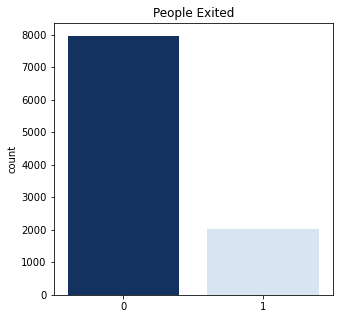

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[5,5])
colours = ["#08306b", "#d4e4f4"]
sns.countplot(y,palette=colours)
plt.title('People Exited')
plt.show()

In [9]:
x_data = data.drop(['Exited'], axis = 1)

Ανάλυση του x_data

In [10]:
x_data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


Με τη μέθοδο decribe() της βιβλιοθήκης pandas, εντοπίζουμε πως υπάρχουν αριθμοί μεγάλης κλίμακας στο x_data.<br>
Θα πρέπει να κανονικοποιήσουμε τις τιμές αυτές σε 0 και 1.

### Κανονικοποίηση (Normalization)

Η κανονικοποίηση των δεδομένων γίνεται με τον παρακάτω τύπο:

In [11]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


### Προσαρμογή των δεδομένων για εκπαίδευση

Θα διαιρέσουμε τα δεδομένα σε (x_train y_train) και σε (x_test y_test). 

Στη συνέχεια θα εκπαιδεύουμε τους αλγορίθμους με τα δεδομένα αυτά και θα προσπαθήσουν να προβλέψουν τα test δεδομένα

Τέλος θα συγκρίνουμε τις προβλέψεις (y_pred) με τα test δεδομένα

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=7)

* x, y: Το data set
* test_size = 0.10: Μέγεθος των test μεταβλητών
* random_state = 7: 

In [13]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (9000, 9)
y_train shape:  (9000,)
x_test shape:  (1000, 9)
y_test shape:  (1000,)


Όπως βλέπουμε τα δεδομένα που διαμοιράστηκαν στις τιμές έχουν την παραπάνω μορφή

## Εκπαίδευση αλγορίθμων εκμάθησης

Σε αυτό το σημείο θα τροφοδοτίσουμε τους τέσσερεις αλγορίθμους που έχουμε με τα δεδομένα που διαχωρίσαμε.

### SUPPORT VECTOR MACHINE (SVM) Αλγόριθμος:



In [14]:
from sklearn.svm import SVC


svm = SVC(random_state = 2) #SVM model with random_state = 2

svm.fit(x_train, y_train) #Train the model

y_pred_svm = svm.predict(x_test) #Predict using x_test

Οπτικοποίηση των προβλέψεων με τη χρήση confusion matrix

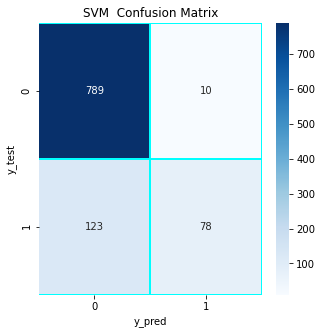

In [15]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_pred_svm) #creating the confusion matrix

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_svm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap=plt.cm.Blues)
plt.title('SVM  Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

<b>Απόδωση Αλγορίθμου</b>: 

In [16]:
svm_acc = svm.score(x_test, y_test)
print(svm_acc)

0.867


### K-NEAREST NEIGHBOUR (KNN) Αλγόριθμος:

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 13)#KNN model with k = 13

knn.fit(x_train, y_train) #Training the model

y_pred_knn = knn.predict(x_test) #Predict using x_test

Οπτικοποίηση των προβλέψεων με τη χρήση confusion matrix

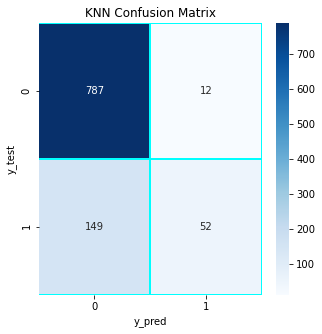

In [18]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn) #creating the confusion matrix

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_knn, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

<b>Απόδωση Αλγορίθμου</b>: 

In [19]:
knn_acc = knn.score(x_test, y_test)
print(knn_acc)

0.839


### RANDOM FOREST  Αλγόριθμος:

In [20]:
from sklearn.ensemble import RandomForestClassifier

rand_for = RandomForestClassifier(n_estimators=100, random_state=3) #random forest model

rand_for.fit(x_train, y_train) #Training the model

y_pred_rand_for = rand_for.predict(x_test) #Predict using x_test

Οπτικοποίηση των προβλέψεων με τη χρήση confusion matrix

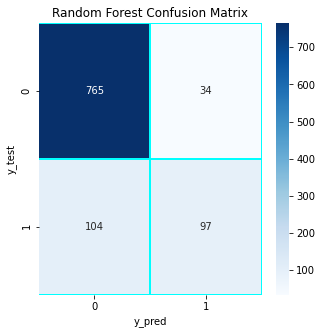

In [21]:
from sklearn.metrics import confusion_matrix

cm_rand_for = confusion_matrix(y_test, y_pred_rand_for) #creating the confusion matrix

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_rand_for, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

<b>Απόδωση Αλγορίθμου</b>: 

In [22]:
rand_for_acc = rand_for.score(x_test, y_test)
print(rand_for_acc)

0.862


### NAIVE BAYES  Αλγόριθμος:

In [23]:
from sklearn.naive_bayes import GaussianNB

naiv_b = GaussianNB() #Naive Bayes model

naiv_b.fit(x_train, y_train) #Training the model

y_pred_naiv_b = naiv_b.predict(x_test) #Predict using x_test

Οπτικοποίηση των προβλέψεων με τη χρήση confusion matrix

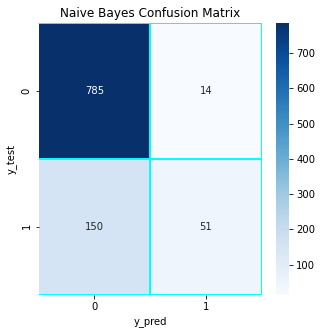

In [47]:
from sklearn.metrics import confusion_matrix

cm_naiv_b = confusion_matrix(y_test, y_pred_naiv_b) #creating the confusion matrix

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_naiv_b, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap = plt.cm.Blues)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

<b>Απόδωση Αλγορίθμου</b>: 

In [25]:
naiv_b_acc = naiv_b.score(x_test, y_test)
print(naiv_b_acc)

0.836


## Σύγκριση Αλγορίθμων

Σε αυτό το σημείο θα συγκρίνουμε τα μοντέλα που εκπαιδεύσαμε 

### Σύγκριση των αποδόσεων



In [26]:
data_acc = pd.Series([svm_acc, 
                      knn_acc, 
                      rand_for_acc, 
                      naiv_b_acc], 
                      index = ['svm_accuracy',
                               'knn_accuracy', 
                               'random_forest_accuracy', 
                               'naive_bayes_accuracy'])

print(data_acc.sort_values(ascending=False))

svm_accuracy              0.867
random_forest_accuracy    0.862
knn_accuracy              0.839
naive_bayes_accuracy      0.836
dtype: float64


Με βάση τις αποδώσεις των αλγορίθμων, προκύπτει ότι ο SVM επιστρέφει τα καλύτερα αποτελέσματα

### Σύγκριση y_test με y_predict

In [27]:
y_predict_test_data = {'y_test': y_test, 
                       'svm_prediction': y_pred_svm,
                       'knn_prediction': y_pred_knn, 
                       'random_forest_prediction': y_pred_rand_for, 
                       'naive_bayes_prediction': y_pred_naiv_b}

array_predictions_test = pd.DataFrame(data = y_predict_test_data)
array_predictions_test.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
y_test,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
svm_prediction,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
knn_prediction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
random_forest_prediction,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
naive_bayes_prediction,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Με τον πίνακα αυτόν μπορούμε να διακρίνουμε για κάθε τιμή του y_test, εάν οι αλγόριθμοι μαντέψανε σωστά.

### Σύγκριση των Confusion Matrixes 

Τέλος για την κατανόηση του ποιός αλγόριθμος κατάφερε να προβλέψει σωστά ή οχι τις τιμές του y_test, συγκρίνουμε τους Confusion Matrixes μεταξύ τους.

Κάθε πίνακας περιέχει το παρακάτω layout:

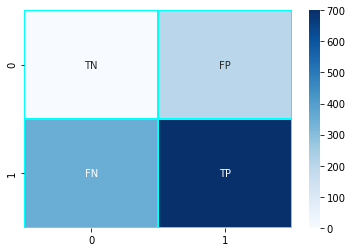

In [28]:
data = np.array([[0,200],[350, 700]])
labels =  np.array([['TN','FP'],['FN','TP']])
fig, ax = plt.subplots()
ax = sns.heatmap(data, annot = labels, linewidth=0.7, linecolor='cyan', fmt='', ax=ax, cmap=plt.cm.Blues)

<b>Σωστές προβλέψεις</b>
* TN (True Negatives): Τιμές που είναι αρνητικές και ο αλγόριθμος τις ταξινόμησε σωστά
* TP (True Positives): Τιμές που είναι θετικές και ο αλγόριθμος τις ταξινόμησε σωστά

<b>Λανθασμένες προβλέψεις</b>
* FN (False Negative): Τιμές που είναι αρνητικές και ο αλγόριθμος δεν ταξινόμησε σωστά
* FP (False Positive): Τιμές που είναι θετικές και ο αλγόριθμος δεν ταξινόμησε σωστά

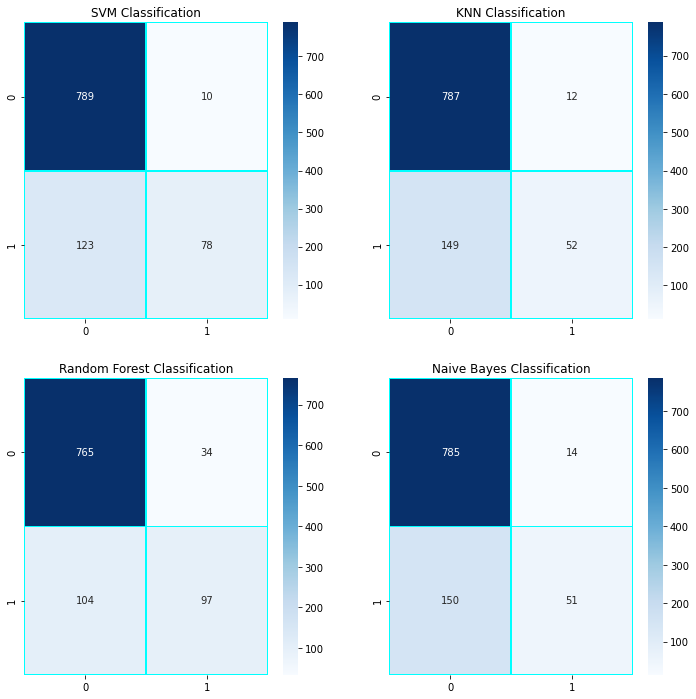

In [56]:
fig = plt.figure(figsize=(12,12))

ax_svm = fig.add_subplot(2, 2, 1)
ax_svm.set_title('SVM Classification')


ax_knn = fig.add_subplot(2, 2, 2) # row, column, position
ax_knn.set_title('KNN Classification')

ax_rand_for = fig.add_subplot(2, 2, 3)
ax_rand_for.set_title('Random Forest Classification')

ax_naiv_b = fig.add_subplot(2, 2, 4)
ax_naiv_b.set_title('Naive Bayes Classification')

sns.heatmap(data = cm_svm, annot = True, linewidth = 0.7, linecolor = 'cyan', fmt = '.0f', ax = ax_svm, cmap = plt.cm.Blues)
sns.heatmap(data = cm_knn, annot = True, linewidth = 0.7, linecolor = 'cyan', fmt = '.0f', ax = ax_knn, cmap = plt.cm.Blues)   
sns.heatmap(data = cm_rand_for, annot = True, linewidth = 0.7, linecolor = 'cyan', fmt ='.0f', ax = ax_rand_for, cmap = plt.cm.Blues)
sns.heatmap(data = cm_naiv_b, annot = True, linewidth = 0.7, linecolor = 'cyan', fmt = '.0f', ax = ax_naiv_b, cmap = plt.cm.Blues)

plt.show()